In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from small_script.myFunctions import *
import feather
import Bio.PDB as bio
import subprocess
from sklearn.cluster import MiniBatchKMeans
d3_to_index = bio.Polypeptide.d3_to_index  # we may want to adjust this in the future.
three_to_one = bio.Polypeptide.three_to_one
one_to_index = bio.Polypeptide.one_to_index
plt.rcParams['figure.figsize'] = [16.18033, 10]

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
def getFragPdb(pdbId, i, outFile=None):
    pdb = pdbId + ".pdb"
    if outFile is None:
        outFile = f"{i}_{pdb}"
#     pdb = "1igqB00.pdb"
#     pdbId = pdb.split('.')[0]
    pre = "/Users/weilu/Research/optimization/fragment/"
    database = "/Users/weilu/Research/optimization/fragment/database/dompdb/"
    parser = bio.PDBParser(QUIET=True)
    structure = parser.get_structure("x", os.path.join(database, pdb))
    for model in structure:
        for chain in model:
            all_residues = list(chain)
            io = bio.PDBIO()
            c = bio.Chain.Chain("A")
            c.child_list = all_residues[i:i+9]
#             for ii, res in enumerate(c):
#                 res.id = (' ', ii+1, ' ')
            io.set_structure(c)
            io.save(f'{pre}{outFile}')
def getScore(data, km):
    #     return km.score(data.iloc[:, 3:87].values)
    #     return data.values[3:4])
    #     return km.score(np.array([1]*84).reshape(1,-1))
    #     return np.sqrt(-km.score(data.values[3:87].reshape(1,-1)))
    #     return np.sqrt(-km.score(data.values.reshape(1,-1)))
    return np.sqrt(((km.cluster_centers_[int(data.values[-1])] - data.values[:-1])**2).sum())
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()

In [3]:
data_original = pd.read_csv("/Users/weilu/Research/optimization/fragment/data_jan20.csv")

FileNotFoundError: [Errno 2] File b'/Users/weilu/Research/optimization/fragment/data_jan20.csv' does not exist: b'/Users/weilu/Research/optimization/fragment/data_jan20.csv'

In [205]:
data_original.head()

,pdb,i,seq,caca_1,caca_2,caca_3,caca_4,caca_5,caca_6,caca_7,...,cbcb_12,cbcb_13,cbcb_14,cbcb_15,cbcb_16,cbcb_17,cbcb_18,cbcb_19,cbcb_20,cbcb_21
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242738,11.389445,14.435853,15.702080,18.185148,9.427593,...,4.605271,8.984904,10.732664,13.098623,10.637720,14.192881,16.225273,11.296279,13.163032,10.095731
1,1igqB00,1,KLKKAIVQV,9.427593,9.508487,13.046163,14.956468,17.811722,21.096529,5.881323,...,10.637720,14.192881,16.225273,19.915300,11.296279,13.163032,16.472520,10.095731,12.801142,9.801298
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,11.296279,13.163032,16.472520,20.721910,10.095731,12.801142,17.423760,9.801298,13.690151,11.383380
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492160,25.003511,9.934756,...,10.095731,12.801142,17.423760,18.518616,9.801298,13.690151,14.967668,11.383380,12.181765,11.096270
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527389,...,9.801298,13.690151,14.967668,19.082531,11.383380,12.181765,16.957390,11.096270,14.904981,10.865062


# get center pdb

In [619]:
pre = "/Users/weilu/Research/optimization/fragment/"
data_original = feather.read_dataframe(f"{pre}cluster100_v2.feather")
os.system(f"mkdir -p {pre}center_cluster100_v2/origin/")
os.system(f"mkdir -p {pre}center_cluster100_v2/pdbs/")
os.system(f"mkdir -p {pre}center_cluster100_v2/gros/")
center = data_original.groupby("cluster").head(1)
for i, row in center.reset_index(drop=True).iterrows():
    print(i, row["pdb"], row["i"], row["cluster"])
    getFragPdb(row["pdb"], int(row["i"]), f"center_cluster100_v2/origin/{row['cluster']}.pdb")
pre = "/Users/weilu/Research/optimization/fragment/center_cluster100_v2//"
for i in range(100):
    os.system(f"python ~/opt/small_script/pdb_reres.py {pre}origin/{i}.pdb > {pre}pdbs/{i}.pdb")
for i in range(100):
    os.system(f"python2 ~/opt/script/Pdb2Gro.py {pre}pdbs/{i}.pdb {pre}gros/{i}.gro")

0 1bg6A02 107 0
1 1c17M00 9 1
2 3p6dA00 53 2
3 3ubrA01 238 3
4 3q3eA03 3 4
5 2yj6A02 47 5
6 2fokB01 110 6
7 4qamB00 141 7
8 2ftxA00 23 8
9 4kksA03 29 9
10 2h5nC00 54 10
11 2y3cA00 135 11
12 3tp9A02 12 12
13 4o7oA02 15 13
14 1tz9A00 65 14
15 2autA00 65 15
16 1dk8A02 58 16
17 2vf7B01 225 17
18 5ja1B00 0 18
19 1e8cA02 213 19
20 4khbC00 59 20
21 1ogpA02 110 21
22 2r0qC01 6 22
23 2ri9A00 67 23
24 2duyA00 33 24
25 4lviA01 108 25
26 3la4A03 40 26
27 2icgA00 73 27
28 3abzA03 22 28
29 2wsaA00 318 29
30 3sigA00 42 30
31 4ag4A02 28 31
32 2p17A00 109 32
33 3k1dA01 28 33
34 4k17A03 55 34
35 1qwoA01 358 35
36 1hp1A01 17 36
37 4xjxA03 163 37
38 4q9dB01 152 38
39 1vw4L02 56 39
40 4dohB02 19 40
41 1uf3A00 25 41
42 3fmgA01 41 42
43 3gkuA02 65 43
44 2y2zA02 1 44
45 4ry8A01 1 45
46 3gw6F01 12 46
47 1y80A00 61 47
48 1d4aA00 241 48
49 1m2vB04 78 49
50 3c24A01 112 50
51 4p2cA01 102 51
52 1jfaB00 163 52
53 2lvvA00 175 53
54 3h75A01 77 54
55 2c0uA03 55 55
56 3l2pA01 91 56
57 3r5eA00 164 57
58 3zwcA03 98 58
59 

In [529]:
data_original = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/cluster100.feather")

In [545]:
center = data_original.groupby("cluster").head(1)

In [548]:
for i, row in center.reset_index(drop=True).iterrows():
    print(i, row["pdb"], row["i"], row["cluster"])
    getFragPdb(row["pdb"], int(row["i"]), f"center_cluster100/{row['cluster']}.pdb")

0 1g9mG00 206 0
1 5cr9A02 26 1
2 2h7fX02 93 2
3 2q9oA03 200 3
4 4yokA01 40 4
5 1b3tA00 103 5
6 4gxtA01 160 6
7 2phpA00 111 7
8 4gb7A00 199 8
9 1nr0A01 123 9
10 3ahcA01 301 10
11 1q5vB01 6 11
12 5ipyA02 54 12
13 1rj1A00 60 13
14 5d01A01 155 14
15 5eufA02 10 15
16 4ua3A00 119 16
17 3lsoA01 97 17
18 2e63A00 86 18
19 2a90A01 70 19
20 1pujA02 13 20
21 1knyA02 109 21
22 3glvA00 105 22
23 4aweA00 263 23
24 3gg4A01 217 24
25 5e7qA01 317 25
26 1eakA01 31 26
27 1sj1A00 49 27
28 1khiA01 5 28
29 4ps6A00 117 29
30 2lpuA00 108 30
31 2rhkC00 17 31
32 1ogyA03 130 32
33 1tr2A02 35 33
34 2wvsA01 100 34
35 4jb1A02 54 35
36 3c8zA01 24 36
37 2xvyA01 10 37
38 3pohA01 10 38
39 1qknA00 20 39
40 1y8qC00 47 40
41 2inyA01 562 41
42 2rgqA00 104 42
43 3sd2A01 58 43
44 3d8kA00 48 44
45 1rmgA00 92 45
46 4hrwB01 127 46
47 1krlA00 32 47
48 4bmjA00 26 48
49 1uwyA01 235 49
50 1biqA00 294 50
51 1pujA02 45 51
52 1fc4A01 58 52
53 1m4zA01 59 53
54 1iooA00 135 54
55 3atsA02 173 55
56 3h09B02 216 56
57 1nr0A01 125 57
58 5fccA

In [550]:
pre = "/Users/weilu/Research/optimization/fragment/center_cluster100/"
for i in range(100):
    os.system(f"python ~/opt/small_script/pdb_reres.py {pre}origin/{i}.pdb > {pre}pdbs/{i}.pdb")

In [554]:
for i in range(100):
    os.system(f"python2 ~/opt/script/Pdb2Gro.py {pre}pdbs/{i}.pdb {pre}gros/{i}.gro")

In [238]:
from sklearn.cluster import KMeans
# x = data_original.head(100).iloc[:, 3:24].values

chosen = data_original.head(1000).reset_index(drop=True)
x = chosen.iloc[:, 3:87].values
kmeans = KMeans(n_clusters=20, random_state=0).fit(x)

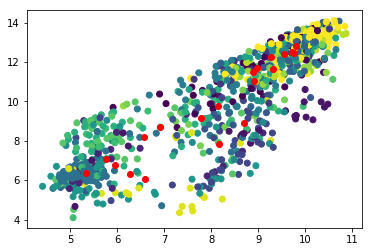

In [239]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red")

In [247]:
from sklearn.cluster import KMeans
# x = data_original.head(100).iloc[:, 3:24].values
# ((kmeans.labels_ == kmeans.predict(x))-1).sum()
chosen = data_original.head(10000).reset_index(drop=True)
x = chosen.iloc[:, 3:87].values
kmeans = KMeans(n_clusters=100, random_state=0).fit(x)

In [245]:
chosen.head()

,pdb,i,seq,caca_1,caca_2,caca_3,caca_4,caca_5,caca_6,caca_7,...,cbcb_13,cbcb_14,cbcb_15,cbcb_16,cbcb_17,cbcb_18,cbcb_19,cbcb_20,cbcb_21,cluster
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242738,11.389445,14.435853,15.702080,18.185148,9.427593,...,8.984904,10.732664,13.098623,10.637720,14.192881,16.225273,11.296279,13.163032,10.095731,9
1,1igqB00,1,KLKKAIVQV,9.427593,9.508487,13.046163,14.956468,17.811722,21.096529,5.881323,...,14.192881,16.225273,19.915300,11.296279,13.163032,16.472520,10.095731,12.801142,9.801298,12
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,13.163032,16.472520,20.721910,10.095731,12.801142,17.423760,9.801298,13.690151,11.383380,12
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492160,25.003511,9.934756,...,12.801142,17.423760,18.518616,9.801298,13.690151,14.967668,11.383380,12.181765,11.096270,19
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527389,...,13.690151,14.967668,19.082531,11.383380,12.181765,16.957390,11.096270,14.904981,10.865062,19


In [307]:
chosen["rmsd"] = chosen.iloc[:,3:87].apply(lambda x: getScore(x, kmeans), axis=1)
chosen["cluster"] = kmeans.labels_

# complete cluster

In [3]:
data_original = pd.read_csv("/Users/weilu/Research/optimization/fragment/data_jan31.csv")

In [4]:
chosen = data_original.reset_index(drop=True)
x = chosen.iloc[:, 3:87].values

In [5]:
kmeans = MiniBatchKMeans(n_clusters=100,
        random_state=0,
        batch_size=200,
        max_iter=300,
        tol=1e4).fit(x)

In [8]:
import pickle
pickle.dump(kmeans, open("/Users/weilu/Research/optimization/fragment/kmeans_cluster100_v2_2", "wb"))

In [11]:
chosen["cluster"] = kmeans.labels_
chosen["rmsd"] = chosen.iloc[:,3:88].apply(lambda x: getScore(x, kmeans), axis=1)

In [12]:
reodered_chosen = chosen.sort_values(["cluster", "rmsd"])
# reodered_chosen.reset_index(drop=True).to_feather("/Users/weilu/Research/optimization/fragment/cluster100_v2.feather")
reodered_chosen.reset_index(drop=True).to_feather("/Users/weilu/Research/optimization/fragment/cluster100_v2_2.feather")


In [603]:
import pickle
# pickle.dump(kmeans, open("/Users/weilu/Research/optimization/fragment/kmeans_cluster100_v2_2", "wb"))
kmeans = pickle.load(open("/Users/weilu/Research/optimization/fragment/kmeans_cluster100_v2", "rb"))

In [491]:
%%time
# %%time
# from sklearn.cluster import KMeans
# # x = data_original.head(100).iloc[:, 3:24].values
# # ((kmeans.labels_ == kmeans.predict(x))-1).sum()
# kmeans = KMeans(n_clusters=100, random_state=0).fit(x)
# # chosen["rmsd"] = chosen.iloc[:,3:87].apply(lambda x: getScore(x, kmeans), axis=1)
# chosen["cluster"] = kmeans.labels_
# fit on the whole data
kmeans = MiniBatchKMeans(n_clusters=500,
        random_state=0,
        batch_size=200,
        max_iter=300,
        tol=1e4).fit(x)

CPU times: user 30.3 s, sys: 5.92 s, total: 36.2 s
Wall time: 14.8 s


In [522]:
chosen["cluster"] = kmeans.labels_
chosen["rmsd"] = chosen.iloc[:,3:88].apply(lambda x: getScore(x, kmeans), axis=1)

In [523]:
reodered_chosen = chosen.sort_values(["cluster", "rmsd"])

In [528]:
reodered_chosen.reset_index(drop=True).to_feather("/Users/weilu/Research/optimization/fragment/cluster500.feather")

In [525]:
t = reodered_chosen.groupby("cluster")["rmsd"].describe().sort_values("count")

In [527]:
t.query("mean < 10")

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
488,211.0,6.405952,2.184369,0.000000,4.851784,6.009832,7.477315,16.365348
419,461.0,8.400869,3.992281,0.000000,5.183176,7.018433,11.271126,21.236263
439,573.0,8.307781,2.359199,0.000000,6.527053,7.899386,9.752821,18.502313
463,631.0,5.769330,1.757134,0.000000,4.605430,5.413044,6.678401,16.163776
394,643.0,7.252995,2.016599,0.000000,5.875750,7.254019,8.251920,16.145780
412,644.0,9.648656,3.423034,0.000000,6.912548,8.817875,12.297921,19.966513
110,752.0,9.885749,2.144300,0.000000,8.255909,9.581002,11.430300,17.489185
324,766.0,9.085841,1.503798,0.000000,8.217952,9.110182,9.995570,13.652618
487,767.0,5.140011,2.070114,0.000000,3.807998,4.542719,5.826916,15.917704


In [524]:
reodered_chosen.groupby("cluster")["rmsd"].describe().sort_values("count")

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
376,59.0,10.838282,3.232352,0.000000,9.192692,10.401419,13.294589,17.287852
211,194.0,15.185838,2.187446,0.000000,13.847370,15.128813,16.679899,20.607763
488,211.0,6.405952,2.184369,0.000000,4.851784,6.009832,7.477315,16.365348
103,284.0,14.563844,1.964411,0.000000,13.410099,14.638768,15.926320,18.627723
125,293.0,15.258882,2.016858,0.000000,14.238791,15.240803,16.369402,21.291743
213,339.0,14.261146,2.222284,0.000000,12.873759,14.402281,15.714741,19.123733
53,387.0,12.113211,3.963168,0.000000,8.359540,13.118751,15.284199,19.085406
145,394.0,13.946271,3.729265,0.000000,12.265290,14.876402,16.538905,22.741212
150,399.0,16.777677,2.235406,0.000000,15.719497,17.039087,18.193809,21.514749


In [488]:
reodered_chosen.reset_index(drop=True).to_feather("/Users/weilu/Research/optimization/fragment/cluster100.feather")

In [486]:
reodered_chosen.groupby("cluster")["rmsd"].describe().sort_values("count")

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
99,952.0,14.943018,3.768664,0.000000,12.702428,15.557707,17.871381,22.480900
91,961.0,12.874403,4.222096,0.000001,10.245549,12.638462,16.007383,23.408196
49,1106.0,14.358321,2.872157,0.000002,12.317531,13.987767,16.424921,22.320873
82,2443.0,14.934389,2.465681,0.000003,13.663287,15.177049,16.573827,22.858531
45,2802.0,14.401188,2.831316,0.000000,12.572518,14.603214,16.425568,22.323190
83,2964.0,14.287125,3.500858,0.000002,11.287813,14.561032,16.984719,22.267516
33,3270.0,14.618352,3.334886,3.575489,12.367087,14.941829,16.960734,24.235116
41,3413.0,15.624262,2.506492,0.000002,14.150406,15.694428,17.373564,22.672772
40,3867.0,13.870901,3.225424,0.000000,11.917269,14.192434,16.083955,23.190758


In [475]:
%%time
from sklearn.cluster import KMeans
# x = data_original.head(100).iloc[:, 3:24].values
# ((kmeans.labels_ == kmeans.predict(x))-1).sum()
chosen = data_original.head(100000).reset_index(drop=True)
x = chosen.iloc[:, 3:5].values
kmeans = KMeans(n_clusters=10, random_state=0).fit(x)
# chosen["rmsd"] = chosen.iloc[:,3:87].apply(lambda x: getScore(x, kmeans), axis=1)
chosen["cluster"] = kmeans.labels_

CPU times: user 6.66 s, sys: 1.21 s, total: 7.87 s
Wall time: 4.84 s


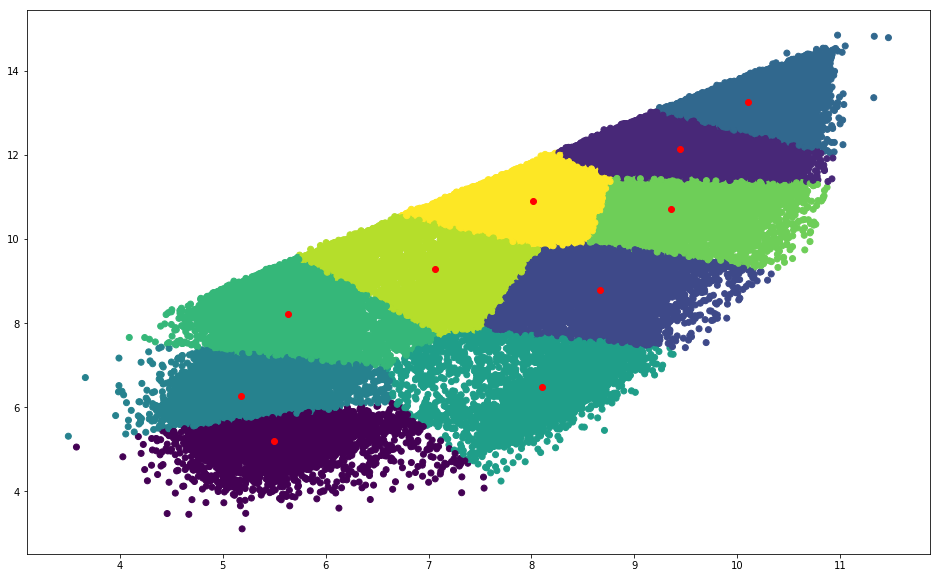

In [467]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red")

In [476]:
%%time
# fit on the whole data
kmeans = MiniBatchKMeans(n_clusters=10,
        random_state=0,
        batch_size=100,
        max_iter=300,
        tol=1e4).fit(x)

CPU times: user 208 ms, sys: 1.98 ms, total: 210 ms
Wall time: 210 ms


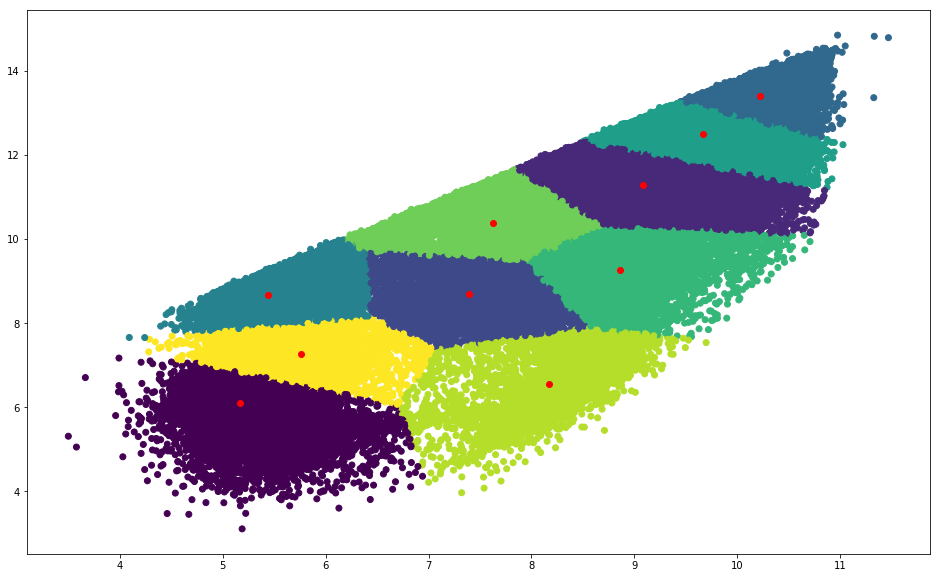

In [477]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red")

# rmsd between cluster centers

In [398]:
from sklearn.cluster import KMeans
# x = data_original.head(100).iloc[:, 3:24].values
# ((kmeans.labels_ == kmeans.predict(x))-1).sum()
chosen = data_original.head(10000).reset_index(drop=True)
x = chosen.iloc[:, 3:87].values
kmeans = KMeans(n_clusters=10, random_state=0).fit(x)
# chosen["rmsd"] = chosen.iloc[:,3:87].apply(lambda x: getScore(x, kmeans), axis=1)
chosen["cluster"] = kmeans.labels_

(100, 84)

In [399]:
# ((t1.reshape(n,1,k) - t1.reshape(1,n,k))**2).sum(axis=2)**0.5
# kmeans.cluster_centers_.shape
n = kmeans.cluster_centers_.shape[0]
k = kmeans.cluster_centers_.shape[1]
t1 = kmeans.cluster_centers_[:n, :k]
cluster_rmsd =((t1.reshape(n,1,k) - t1.reshape(1,n,k))**2).sum(axis=2)**0.5
cluster_rmsd[cluster_rmsd==0.0] = 100
cluster_rmsd.min()

18.62429297622066

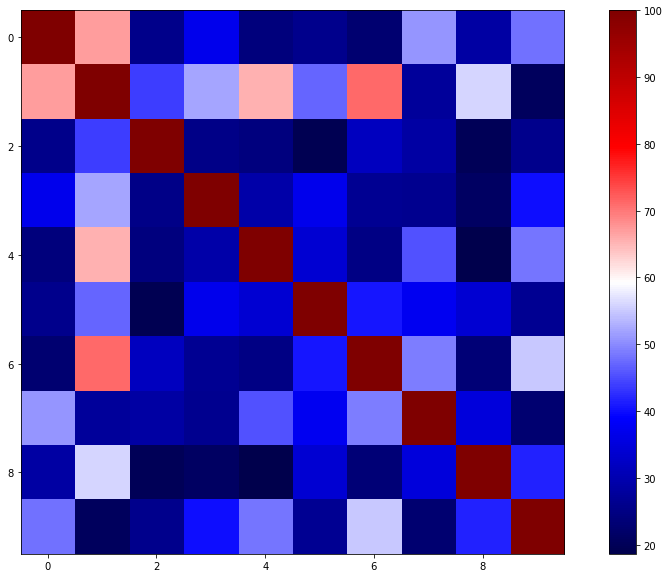

In [400]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.imshow(cluster_rmsd, cmap="seismic")
plt.colorbar()

In [391]:
n = kmeans.cluster_centers_.shape[0]
k = kmeans.cluster_centers_.shape[1]
t1 = kmeans.cluster_centers_[:n, :k]
cluster_rmsd =((t1.reshape(n,1,k) - t1.reshape(1,n,k))**2).sum(axis=2)**0.5

In [392]:
cluster_rmsd[cluster_rmsd==0.0] = 100

In [393]:
cluster_rmsd.min()

4.854396829416842

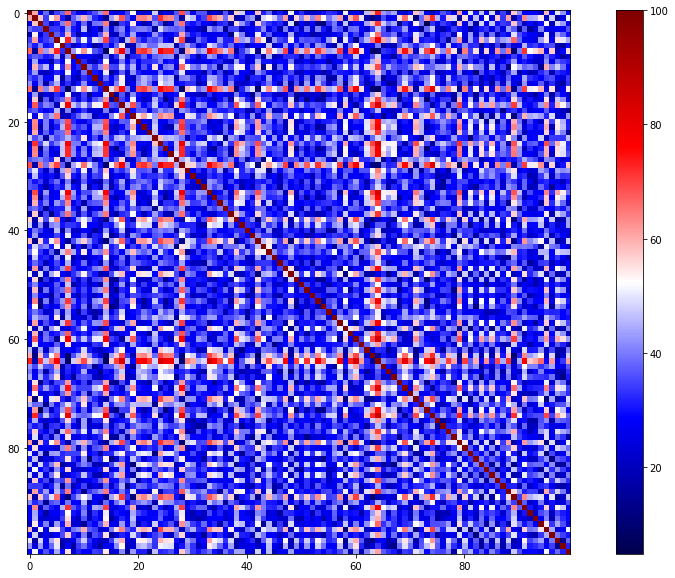

In [394]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.imshow(cluster_rmsd, cmap="seismic")
plt.colorbar()

In [271]:
kmeans.score(x[0].reshape(1,-1))

-89.79255359750277

In [314]:
d = chosen.query("cluster == 88").sort_values("rmsd").reset_index(drop=True)

In [ ]:
# compute the rmsd with respect to the pdb that closest to the cluster center
pdbList = glob.glob(f"{pre}cluster88/[0-9]*.pdb")
with open(pre+"cluster88_rmsd.csv", "w") as out:
    out.write("i,j,rmsd\n")
    for p1 in pdbList:
        i1 = int(p1.split("/")[-1].split(".")[0])
        if i1 != 0:
            continue
        print(i1)
        for p2 in pdbList:
            i2 = p2.split("/")[-1].split(".")[0]
            rmsd = float(getFromTerminal(f"calculate_rmsd.py {p1} {p2}"))
            out.write(f"{i1},{i2},{rmsd}\n")

In [349]:
cluster88 = pd.read_csv(pre+"cluster88_rmsd.csv")

# average CA rmsd is about 1.3(max 2.7) within the cluster. 

In [354]:
cluster88.query("i!=j").groupby("i")["rmsd"].describe().sort_values("mean").head()

,count,mean,std,min,25%,50%,75%,max
i,,,,,,,,
0,55.0,1.297952,0.621858,0.247209,0.744088,1.234168,1.814403,2.669655
3,55.0,1.302234,0.606989,0.390278,0.766102,1.263094,1.783251,2.655407
2,55.0,1.303887,0.638794,0.174071,0.717086,1.283669,1.838137,2.670576
4,55.0,1.308397,0.648857,0.174071,0.727001,1.307860,1.865656,2.601067
9,55.0,1.331420,0.539353,0.387006,0.917789,1.346706,1.728705,2.387373


In [355]:
d

,pdb,i,seq,caca_1,caca_2,caca_3,caca_4,caca_5,caca_6,caca_7,...,cbcb_14,cbcb_15,cbcb_16,cbcb_17,cbcb_18,cbcb_19,cbcb_20,cbcb_21,cluster,rmsd
0,3bwsA02,124,SVIDRKTKL,9.949520,11.881444,15.007518,14.224649,11.941430,10.004884,9.158696,...,7.121051,6.843129,4.431560,7.335259,5.484321,7.748463,9.831528,9.043426,88,3.819305
1,2gy5A03,19,GVCHEDTGE,9.729459,12.950154,15.225656,13.891017,11.779313,9.805697,9.412597,...,6.277780,7.273304,4.563250,6.884191,5.750976,8.210796,10.516659,9.288854,88,4.452417
2,5teeA01,333,KCWDIATLE,10.085794,12.141468,15.270156,14.333816,11.746857,10.142472,9.340342,...,6.638502,6.956893,4.632072,7.229734,5.380895,6.813114,9.548963,8.939441,88,4.612135
3,5a2fA02,56,KEMDPVTQL,10.218586,12.734818,15.575337,14.460573,11.705797,10.030134,9.314142,...,6.102289,7.088407,4.625541,6.740666,5.120184,7.463485,9.995037,9.003468,88,4.821177
4,3bwsA02,269,YVIDTTTDT,9.946895,12.214399,15.314721,14.489808,11.962596,10.234323,9.240640,...,6.559402,6.920260,5.023807,7.303305,5.770678,6.323815,9.489404,8.827125,88,5.162033
5,5teeA01,89,KIWDVETKT,10.036064,12.049080,15.123745,14.087447,11.657670,9.739409,9.672215,...,7.149391,6.913264,4.877741,7.522132,5.712117,6.512667,9.248618,8.779138,88,5.462373
6,2xt6B03,81,VIVDRKTGE,9.954157,12.611201,15.333824,14.229970,11.283616,9.897378,9.132003,...,6.168306,7.465668,4.440479,6.005554,4.201615,8.649049,9.925421,8.656796,88,5.566763
7,3bwsA02,35,DVLDINSGQ,9.834118,11.908249,14.979401,14.166902,11.109526,10.022712,9.741758,...,7.071804,7.131282,4.950830,6.842302,4.385797,7.382644,9.384715,7.943592,88,5.761471
8,3bwsA02,213,EVYDLKEKK,9.741776,12.013299,15.171566,13.940570,12.418761,9.452124,9.560477,...,8.233245,6.993384,3.955309,7.474078,6.513636,6.924696,9.438110,9.940254,88,5.987422
9,4x36A02,83,YYLDAKEGA,9.940290,12.375504,15.257021,14.755202,11.646676,10.272871,8.773566,...,5.879449,6.757819,5.124569,5.930865,5.363800,8.044666,10.621360,9.346555,88,6.043243


In [315]:
for i, row in d.iterrows():
    print(i, row["pdb"], row["i"])
    getFragPdb(row["pdb"], int(row["i"]), f"cluster88/{i}.pdb")

0 3bwsA02 124
1 2gy5A03 19
2 5teeA01 333
3 5a2fA02 56
4 3bwsA02 269
5 5teeA01 89
6 2xt6B03 81
7 3bwsA02 35
8 3bwsA02 213
9 4x36A02 83
10 3bwsA02 81
11 2czrA02 47
12 4lpqA02 9
13 3tunA02 34
14 3bwsA02 104
15 3bwsA02 301
16 1igqB00 31
17 3tunA02 8
18 3bwsA02 114
19 2czrA02 84
20 4x36A02 96
21 5teeA01 132
22 3bwsA02 235
23 3bwsA02 291
24 1ka1A02 87
25 3bwsA02 146
26 3a79B00 508
27 3bwsA02 62
28 3hviA00 192
29 1kvkA01 49
30 3bwsA02 250
31 1p9hA00 9
32 5b3kA00 89
33 2yeqA02 154
34 1vx7E02 94
35 2mj6A00 74
36 4b9gA00 53
37 4gyiA03 44
38 3tunA02 107
39 3majA02 49
40 2bteA05 49
41 2yeqA02 235
42 5a2fA02 10
43 5b3kA00 5
44 4kqcA02 19
45 1ac5A00 282
46 1iv8A04 55
47 5tjjA02 29
48 1a48A01 21
49 1vx7E02 79
50 1vliA01 270
51 1vx7E02 146
52 2xt6B03 97
53 2ebeA00 24
54 3bwsA02 194
55 2gy5A03 12


In [309]:
chosen.groupby("cluster")["rmsd"].describe().sort_values("count")

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
86,25.0,12.868003,2.429841,8.180901,11.585724,13.128961,15.137856,16.086021
31,27.0,10.473506,2.571394,6.830730,8.555585,10.168139,12.625339,15.197835
20,37.0,11.948910,3.092640,7.513775,9.795009,11.379272,13.952240,18.524402
92,38.0,13.966047,2.389854,8.431391,12.411322,14.141286,16.221890,17.391868
57,41.0,13.543257,2.579857,9.174207,11.875370,13.287241,14.786760,19.987259
52,41.0,12.396760,2.120092,7.802385,10.917835,11.902867,13.991850,17.486862
45,42.0,12.519146,2.424179,6.651546,11.085333,12.652927,13.997425,17.496040
90,42.0,10.328494,3.056165,5.334071,7.579417,9.787187,12.954448,16.926965
69,44.0,11.745726,4.110222,5.725782,7.896013,10.928373,14.615448,19.751685


In [296]:
chosen.groupby("cluster")["rmsd"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,47.0,14.509444,2.470353,9.226504,13.101469,14.556386,16.572913,19.358230
1,134.0,8.061704,2.264072,3.513803,6.336191,7.963095,9.393186,16.710189
2,285.0,4.884285,2.033753,1.825475,3.610672,4.196315,5.714881,13.594217
3,63.0,11.792323,2.030125,7.925980,10.115502,11.795392,13.097566,15.275605
4,55.0,12.095456,3.200645,5.986447,9.502334,11.845416,13.925985,18.225360
5,88.0,10.875914,3.103294,5.921701,8.141490,10.544263,13.040039,18.224837
6,46.0,10.668448,2.545219,6.227311,8.140037,11.016674,12.629587,15.423659
7,208.0,6.800668,1.333470,3.752799,5.853304,6.655734,7.592728,10.969135
8,64.0,11.639289,2.423901,6.294332,9.685099,11.532024,13.191878,16.898084


In [249]:
chosen.groupby("cluster")["caca_1"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,47.0,9.107972,0.967933,6.033747,8.792595,9.222053,9.653984,10.783340
1,134.0,9.283012,0.434942,8.082854,9.065539,9.288622,9.464692,10.421309
2,285.0,5.231241,0.302073,3.988152,5.036580,5.179334,5.347704,6.532340
3,63.0,6.605184,1.571319,4.544618,5.137373,6.012451,7.725599,10.031975
4,55.0,6.139642,1.315773,4.880736,5.251148,5.602896,6.290223,9.585359
5,88.0,6.455053,1.470074,4.464227,5.159675,5.598491,7.858600,9.366185
6,46.0,9.717776,0.675211,7.649774,9.463802,9.911917,10.162426,10.543301
7,208.0,9.950973,0.487548,8.361642,9.739443,10.024712,10.305412,10.865170
8,64.0,9.245912,0.768627,7.141240,8.706300,9.304117,9.840726,10.642015


In [233]:
d = data_original.head(1000)[kmeans.labels_ == 0]
for i, row in d.iterrows():
    print(i, row["pdb"], row["i"])

6 1igqB00 6
14 1igqB00 14
20 1igqB00 20
29 1igqB00 29
39 1igqB00 39
65 2r7rA08 16
220 3fcnA00 118
225 3fcnA00 123
230 3fcnA00 128
267 5tjjA02 27
290 5tjjA02 50
296 5tjjA02 56
326 5tjjA02 86
352 5tjjA02 112
369 5tjjA02 129
419 2gy5A03 17
428 2gy5A03 26
441 2gy5A03 39
454 2gy5A03 52
467 2gy5A03 65
475 2gy5A03 73
488 2gy5A03 86
502 2gy5A03 100
509 2gy5A03 107
517 2gy5A03 115
528 2gy5A03 126
566 1ka1A02 37
594 1ka1A02 65
614 1ka1A02 85
622 1ka1A02 93
631 1ka1A02 102
638 1ka1A02 109
662 2czrA02 6
675 2czrA02 19
701 2czrA02 45
709 2czrA02 53
738 2czrA02 82
746 2czrA02 90
753 2czrA02 97
769 1a48A01 1
787 1a48A01 19
802 1a48A01 34
808 1a48A01 40
836 1a48A01 68
841 1a48A01 73
872 1n08A00 1
891 1n08A00 20
906 1n08A00 35
928 1n08A00 57
956 1n08A00 85
964 1n08A00 93


In [232]:
i = 0
((x[i] - kmeans.cluster_centers_[kmeans.labels_[i]])**2)

array([1.99762260e+00, 6.08547783e+00, 1.60923936e-01, 2.37948752e+00,
       7.32518437e-01, 1.82500920e+00, 4.06818698e+00, 1.24109133e+00,
       7.15746328e+00, 6.30259290e+00, 1.00427376e+01, 4.99073131e-01,
       4.70566311e-01, 4.60160346e-01, 1.20339491e+00, 1.86631283e+00,
       3.52674964e+00, 4.53173738e+00, 4.58810165e-01, 5.22721704e-01,
       4.65781076e-02, 3.17588895e+00, 1.27787050e+01, 1.26398678e-02,
       3.30453780e+00, 6.45726474e-01, 5.38713829e-01, 8.91350571e+00,
       5.56125657e-01, 8.53646906e+00, 5.90221803e+00, 6.77068565e+00,
       7.44166894e-01, 7.17918538e-01, 4.57289185e-01, 2.46043792e-01,
       1.80884812e+00, 3.64631819e+00, 2.66007485e+00, 4.56652806e-01,
       1.68522764e-01, 6.33084480e-03, 1.48740274e+00, 4.22502739e+00,
       1.01220387e-01, 2.55282600e-01, 1.24617964e-01, 3.00895134e-03,
       6.86502116e+00, 5.05230963e+00, 1.58429942e+01, 1.61148917e+01,
       2.15972173e+01, 4.29636052e+00, 4.42807599e-01, 5.83744226e-01,
      

# with only ca ca distance

In [3]:
data_original = pd.read_csv("/Users/weilu/Research/optimization/fragment/clustered_bin2_jan18.csv", index_col=0)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data_original.head()

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d15,d16,d17,d18,d19,d20,d21,dd,category,count
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,15,9,13,15,9,13,9,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",NaN,NaN
1,1igqB00,1,KLKKAIVQV,9.427593,9.508488,13.046163,14.956468,17.811722,21.096529,5.881323,...,19,9,13,17,9,13,9,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",NaN,NaN
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,19,9,13,17,9,13,11,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",NaN,NaN
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492163,25.003511,9.934756,...,19,9,13,15,11,13,11,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987.0,13.0
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527388,...,19,11,13,17,11,13,11,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835.0,18.0


In [70]:
data_original.shape

(1901430, 49)

In [87]:
data_original.head()

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d15,d16,d17,d18,d19,d20,d21,dd,category,count
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,15,9,13,15,9,13,9,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",NaN,NaN
1,1igqB00,1,KLKKAIVQV,9.427593,9.508488,13.046163,14.956468,17.811722,21.096529,5.881323,...,19,9,13,17,9,13,9,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",NaN,NaN
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,19,9,13,17,9,13,11,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",NaN,NaN
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492163,25.003511,9.934756,...,19,9,13,15,11,13,11,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987.0,13.0
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527388,...,19,11,13,17,11,13,11,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835.0,18.0


In [71]:
from sklearn.cluster import KMeans
x = data_original.head(10000).iloc[:, 3:24].values
kmeans = KMeans(n_clusters=1000, random_state=0).fit(x)

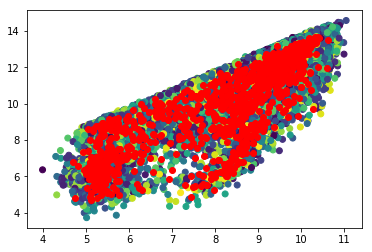

In [75]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red")

In [90]:
kmeans.score(x[3:4])

-3.2598634605765255

In [130]:
data_original.head(10000)[kmeans.labels_ == 941]

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d15,d16,d17,d18,d19,d20,d21,dd,category,count
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,15,9,13,15,9,13,9,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",NaN,NaN
2734,3bwsA02,260,KKGLVLGKV,9.273508,11.413203,12.253963,13.338609,17.082760,19.947418,8.448602,...,15,9,13,17,9,13,11,"9,11,13,13,17,19,9,9,11,15,17,7,9,13,15,9,13,1...",NaN,NaN
3623,2kwbA00,48,PSAEEGAED,10.160047,12.109205,12.734339,13.432731,16.219532,18.111626,9.109225,...,15,9,13,17,9,13,9,"11,13,13,13,17,19,9,11,13,15,17,7,9,13,15,9,13...",NaN,NaN
4542,4x36A02,113,TLADKPEFT,8.823990,11.467757,11.260575,14.548013,16.793629,19.895035,8.978478,...,15,9,13,17,9,13,11,"9,11,11,15,17,19,9,9,13,15,19,5,9,11,15,9,13,1...",NaN,NaN
5234,2xt6B03,77,QRHAVIVDR,8.991055,11.222426,11.667209,14.419406,17.422922,17.947512,8.275139,...,13,11,13,15,9,13,9,"9,11,11,15,17,17,9,9,13,17,17,5,9,13,13,11,13,...",NaN,NaN


In [169]:
data_original.head(10000)[kmeans.labels_ == 55]

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d15,d16,d17,d18,d19,d20,d21,dd,category,count
81,2r7rA08,32,HENEIQLYL,5.333650,6.582048,8.963180,10.288549,10.966698,12.824388,5.418285,...,11,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,11,11,5,7,9,11,5,7,9,5,7,5",7.0,12033.0
82,2r7rA08,33,ENEIQLYLI,5.418285,6.527355,9.036262,10.305749,11.110831,12.772940,5.267358,...,11,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,11,11,5,7,9,11,5,7,9,5,7,5",7.0,12033.0
109,2r7rA08,60,SRDKYRILE,5.273392,7.189122,9.218030,10.316360,11.565206,13.020775,5.393554,...,9,5,7,9,5,5,5,"5,7,9,11,11,13,5,7,9,11,11,5,5,9,9,5,7,9,5,5,5",119.0,500.0
136,3fcnA00,9,FVWCQQQAD,5.353385,6.903554,8.958042,10.115607,11.136167,12.917888,5.357417,...,9,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,11,11,5,5,9,9,5,7,9,5,7,5",26.0,2898.0
203,3fcnA00,101,GVIWRRAVS,5.706202,6.473025,8.968908,10.203383,11.063753,12.901576,5.376695,...,11,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,11,11,5,7,9,11,5,7,9,5,7,5",7.0,12033.0
211,3fcnA00,109,SEAKAALIE,5.344415,6.596049,8.857686,10.147244,11.163829,13.002431,5.334358,...,9,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,11,11,5,5,9,9,5,7,9,5,7,5",26.0,2898.0
262,5tjjA02,14,AELHQVAAH,5.302562,6.808673,9.016759,10.052061,10.938404,12.879579,5.065632,...,9,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",1.0,20575.0
316,5tjjA02,76,DESTWRRVL,5.653988,7.055184,9.186121,10.291211,11.365362,13.000630,4.902782,...,9,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",1.0,20575.0
397,5tjjA02,165,ESAAKVSAW,5.407758,6.636605,9.023434,10.096171,11.093265,12.860629,5.241992,...,9,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,9,11,5,5,9,9,5,7,9,5,7,5",32.0,2048.0
573,1ka1A02,44,QAKYCLLAL,5.226872,6.776495,8.958233,10.000200,10.943960,12.758240,4.969972,...,9,5,7,9,5,7,5,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",1.0,20575.0


In [194]:
d = data_original.head(10000)[kmeans.labels_ == 450]
for i, row in d.iterrows():
    print(i, row["pdb"], row["i"])
    getFragPdb(row["pdb"], int(row["i"]), f"compare/{i}.pdb")

331 5tjjA02 91
880 1n08A00 9
1484 1opoA02 43
1797 5j47A03 18
8991 2yeqA02 46
9529 1ydxA03 71


In [175]:
getFragPdb("3bwsA02.pdb", 260, "test2.pdb")

In [196]:
getFragPdb("2r7rA08", 32)

In [197]:
getFragPdb("2r7rA08", 33)

In [97]:
i = 0
((x[i] - kmeans.cluster_centers_[kmeans.labels_[i]])**2).sum()

4.322128020315504

In [95]:
((x[3] - kmeans.cluster_centers_[kmeans.labels_[3]])**2).sum()

3.2598634605762107

In [183]:
pd.Series(kmeans.labels_).value_counts()[500:]

450    6
497    6
64     6
688    6
494    6
363    6
395    6
123    6
486    6
101    6
919    6
378    6
475    6
483    6
457    6
835    6
539    6
271    6
861    6
869    6
560    6
238    6
626    6
637    6
509    6
415    6
719    6
261    6
665    6
84     6
      ..
917    2
624    2
14     1
681    1
868    1
753    1
15     1
959    1
788    1
531    1
601    1
952    1
18     1
213    1
874    1
406    1
522    1
518    1
308    1
330    1
904    1
872    1
184    1
840    1
832    1
548    1
186    1
954    1
19     1
797    1
Length: 500, dtype: int64

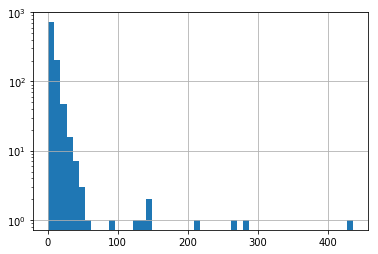

In [178]:
pd.Series(kmeans.labels_).value_counts().hist(bins=50, log=True)

In [ ]:
import os
# get the fragment pdb
pdb = "1igqB00.pdb"
pdbId = pdb.split('.')[0]
i = 0
pre = "/Users/weilu/Research/optimization/fragment/"
database = "/Users/weilu/Research/optimization/fragment/database/dompdb/"
parser = bio.PDBParser(QUIET=True)
structure = parser.get_structure("x", os.path.join(database, pdb))
for model in structure:
    for chain in model:
        all_residues = list(chain)
        io = bio.PDBIO()
        c = bio.Chain.Chain("A")
        c.child_list = cc.child_list[i:i+9]
        for ii, res in enumerate(c):
            res.id = (' ', ii+1, ' ')
        io.set_structure(c)
        io.save(f'{pre}test.pdb')

In [ ]:

import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [4, 4]])

kmeans.cluster_centers_



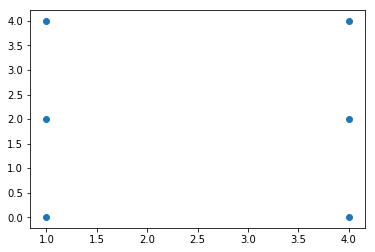

In [20]:
plt.scatter(X[:, 0], X[:, 1])

In [7]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1], dtype=int32)

In [6]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [3]:
data = data_original.fillna(-1)[["pdb", "i", "seq","dd", "category", "count"]]
data["category"] = data["category"].astype(int)
data["count"] = data["count"].astype(int)
for i in range(1,10):
    data[f"s{i}"] = data["seq"].apply(lambda x: one_to_index(x[i-1]))

In [15]:
data.to_feather("/Users/weilu/Research/optimization/fragment/feather_cluster_data.feather")

In [13]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [14]:
data.tail()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
1901425,1xjhA00,49,NAMDIAEIR,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",1,20575,11,0,10,2,7,0,3,7,14
1901426,1xjhA00,50,AMDIAEIRN,"5,7,9,9,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",2,18996,0,10,2,7,0,3,7,14,11
1901427,1xjhA00,51,MDIAEIRNN,"5,7,9,9,11,13,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5",3,18382,10,2,7,0,3,7,14,11,11
1901428,1xjhA00,52,DIAEIRNNA,"5,7,9,11,11,11,5,7,9,9,11,5,7,9,11,5,7,9,5,5,5",81,745,2,7,0,3,7,14,11,11,0
1901429,1xjhA00,53,IAEIRNNAS,"5,7,9,9,11,11,5,7,9,11,11,5,7,9,11,5,5,7,5,5,5",2071,46,7,0,3,7,14,11,11,0,15


In [6]:
data.shape

(1901430, 15)

In [7]:
data.query("count != -1").shape

(753824, 15)

In [8]:
data.query("count > 500").shape

(325598, 15)

In [12]:
data.query("count != -1").sample(10)

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
83349,4pz0A01,131,GDSFEVKGI,"11,13,17,21,21,19,11,13,17,19,17,11,13,15,13,1...",6062,20,5,2,15,4,3,17,8,5,7
376107,3ot5A02,26,MQGMFEAVR,"5,7,9,9,11,13,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5",3,18382,10,13,5,10,4,3,0,17,14
77904,1fmzA00,147,QYIGIHRDR,"9,13,15,19,21,25,11,13,17,19,23,9,13,15,19,11,...",927,87,13,19,7,5,7,6,14,2,14
1335697,2je2A00,3,AEFNDKGEL,"11,13,15,11,11,7,11,11,9,9,7,7,5,5,5,5,5,7,7,9,9",1664,55,0,3,4,11,2,8,5,3,9
531509,3i5xA02,26,HIKKQIKER,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,5,5",34,1811,6,7,8,8,13,7,8,3,14
912144,4qtuB00,151,DQVDDILQS,"5,7,9,9,11,13,5,7,9,9,11,5,7,9,11,5,5,9,5,7,5",14,4800,2,13,17,2,2,7,9,13,15
1182231,1sbzA00,155,ARVLDQFGL,"5,7,9,11,11,9,5,7,9,9,9,5,7,9,9,5,7,5,5,5,7",60,1011,0,14,17,9,2,13,4,5,9
1438574,2cfuA01,327,GNAEIVEVL,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,5,11,0,3,7,17,3,17,9
1346608,3p32A01,12,DRAALPRAI,"5,7,9,11,11,13,5,7,9,11,11,7,7,9,11,5,7,9,5,7,5",328,207,2,14,0,0,9,12,14,0,7
1468369,4ds7E00,11,LVLACVRMK,"5,7,9,9,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",0,39130,9,17,9,0,1,17,14,10,8


In [11]:
data.query("category == 0").shape

(39130, 15)

In [17]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [108]:
data.head().iloc[:,6:]

,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,2,8,9,8,8,0,7,17,13
1,8,9,8,8,0,7,17,13,17
2,9,8,8,0,7,17,13,17,3
3,8,8,0,7,17,13,17,3,6
4,8,0,7,17,13,17,3,6,2


In [18]:
test = data.query("count > 500")


In [19]:
train_x = test.iloc[:,6:].values
train_y = test["category"].values

In [ ]:
train_x.shape

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(train_x, train_y) 
svm_predictions = svm_model_linear.predict(train_x) 

In [ ]:
from sklearn.metrics import confusion_matrix 
# model accuracy for X_test   
accuracy = svm_model_linear.score(train_x, train_y) 
  
# creating a confusion matrix 
cm = confusion_matrix(train_y, svm_predictions) 

In [111]:
train_x.shape

(1901430, 9)

In [115]:
train_y

array([  -1,   -1,   -1, ...,    3,   81, 2071])

In [114]:
train_y.shape

(1901430,)

In [68]:
seq_count = data["seq"].value_counts()
filtered_seq_count = seq_count[seq_count>1].reset_index().rename(columns={"seq":"index", "index":"seq"})
data_filtered = data_original.merge(filtered_seq_count, on="seq")

In [95]:
def get_total_std(a):
    return a.iloc[:,3:6].std().sum()

In [99]:
data_filtered_total_std = data_filtered.groupby("seq").apply(get_total_std)

# small total std dominates. 

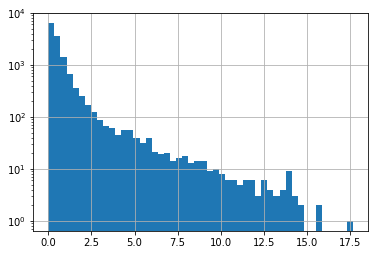

In [104]:
data_filtered_total_std.hist(bins=50, log=True)

In [46]:
data_original.head()

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d15,d16,d17,d18,d19,d20,d21,dd,category,count
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,15,9,13,15,9,13,9,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",NaN,NaN
1,1igqB00,1,KLKKAIVQV,9.427593,9.508488,13.046163,14.956468,17.811722,21.096529,5.881323,...,19,9,13,17,9,13,9,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",NaN,NaN
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,19,9,13,17,9,13,11,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",NaN,NaN
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492163,25.003511,9.934756,...,19,9,13,15,11,13,11,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987.0,13.0
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527388,...,19,11,13,17,11,13,11,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835.0,18.0


In [44]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [6]:
data.dtypes

pdb          object
i             int64
seq          object
dis1        float64
dis2        float64
dis3        float64
dis4        float64
dis5        float64
dis6        float64
dis7        float64
dis8        float64
dis9        float64
dis10       float64
dis11       float64
dis12       float64
dis13       float64
dis14       float64
dis15       float64
dis16       float64
dis17       float64
dis18       float64
dis19       float64
dis20       float64
dis21       float64
DisType      object
d1            int64
d2            int64
d3            int64
d4            int64
d5            int64
d6            int64
d7            int64
d8            int64
d9            int64
d10           int64
d11           int64
d12           int64
d13           int64
d14           int64
d15           int64
d16           int64
d17           int64
d18           int64
d19           int64
d20           int64
d21           int64
dd           object
category    float64
count       float64
dtype: object